# Zero to Hero

## 1.07 Aplicando el arbol

Se aplicará el modelo generado por rpart a los datos nuevos y se genera la salida para Kaggle

In [1]:
rm( list=ls())
gc()

library( "data.table")   #cargo la libreria  data.table
library( "rpart")  #cargo la libreria  rpart
library( "rpart.plot")

options(repr.plot.width=20, repr.plot.height=10) 
setwd("/Users/mmarchetta/Desktop/laboratorio1")  #Aqui se debe poner la ruta de la PC local

,used,(Mb),gc trigger,(Mb),limit (Mb),max used,(Mb)
Ncells,630293,33.7,1360722,72.7,NA,1360722,72.7
Vcells,1174327,9.0,8388608,64.0,32768,1840749,14.1


In [2]:
dataset <- fread("./datasets/dataset_pequeno.csv")   #cargo el dataset #cargo el dataset

In [3]:
dtrain <- dataset[ foto_mes==202107 ]
dapply <- dataset[ foto_mes==202109 ]

In [4]:
#genero el modelo
modelo <-  rpart::rpart(formula= "clase_ternaria ~ ." ,
                        data= dtrain,
                        xval= 0,
                        cp= -1,
                        maxdepth= 2 )

Aplico el modelo a los datos dapply  pidiendo que me devuelva probabildades

In [5]:
prediccion  <- predict( modelo, dapply, type = "prob")

Analizo que queda en prediccion

In [6]:
head( prediccion )

,BAJA+1,BAJA+2,CONTINUA
1,0.002285635,0.003102923,0.9946114
2,0.002285635,0.003102923,0.9946114
3,0.034907598,0.030458590,0.9346338
4,0.002285635,0.003102923,0.9946114
5,0.002285635,0.003102923,0.9946114
6,0.002285635,0.003102923,0.9946114


Prediccion es una matriz; me interesa la columna "BAJA+2"  que es la probabilidad que modelo asigna a cada registro de dapply

In [7]:
prob_baja2  <- prediccion[, "BAJA+2"]

In [8]:
head( prob_baja2)

1           2           3           4           5           6 
0.003102923 0.003102923 0.030458590 0.003102923 0.003102923 0.003102923

prob_baja2 es el vector de probabilidades

In [9]:
length( prob_baja2 )
nrow( dapply )

[1] 165237

[1] 165237

Ahora decido si envio el estimulo o no
<br>
si prob( BAJA+2) > 0.025  envio  el estímulo

In [10]:
Predicted   <- ifelse( prob_baja2 > 0.025, 1, 0 )

In [11]:
head( Predicted)

1 2 3 4 5 6 
0 0 1 0 0 0

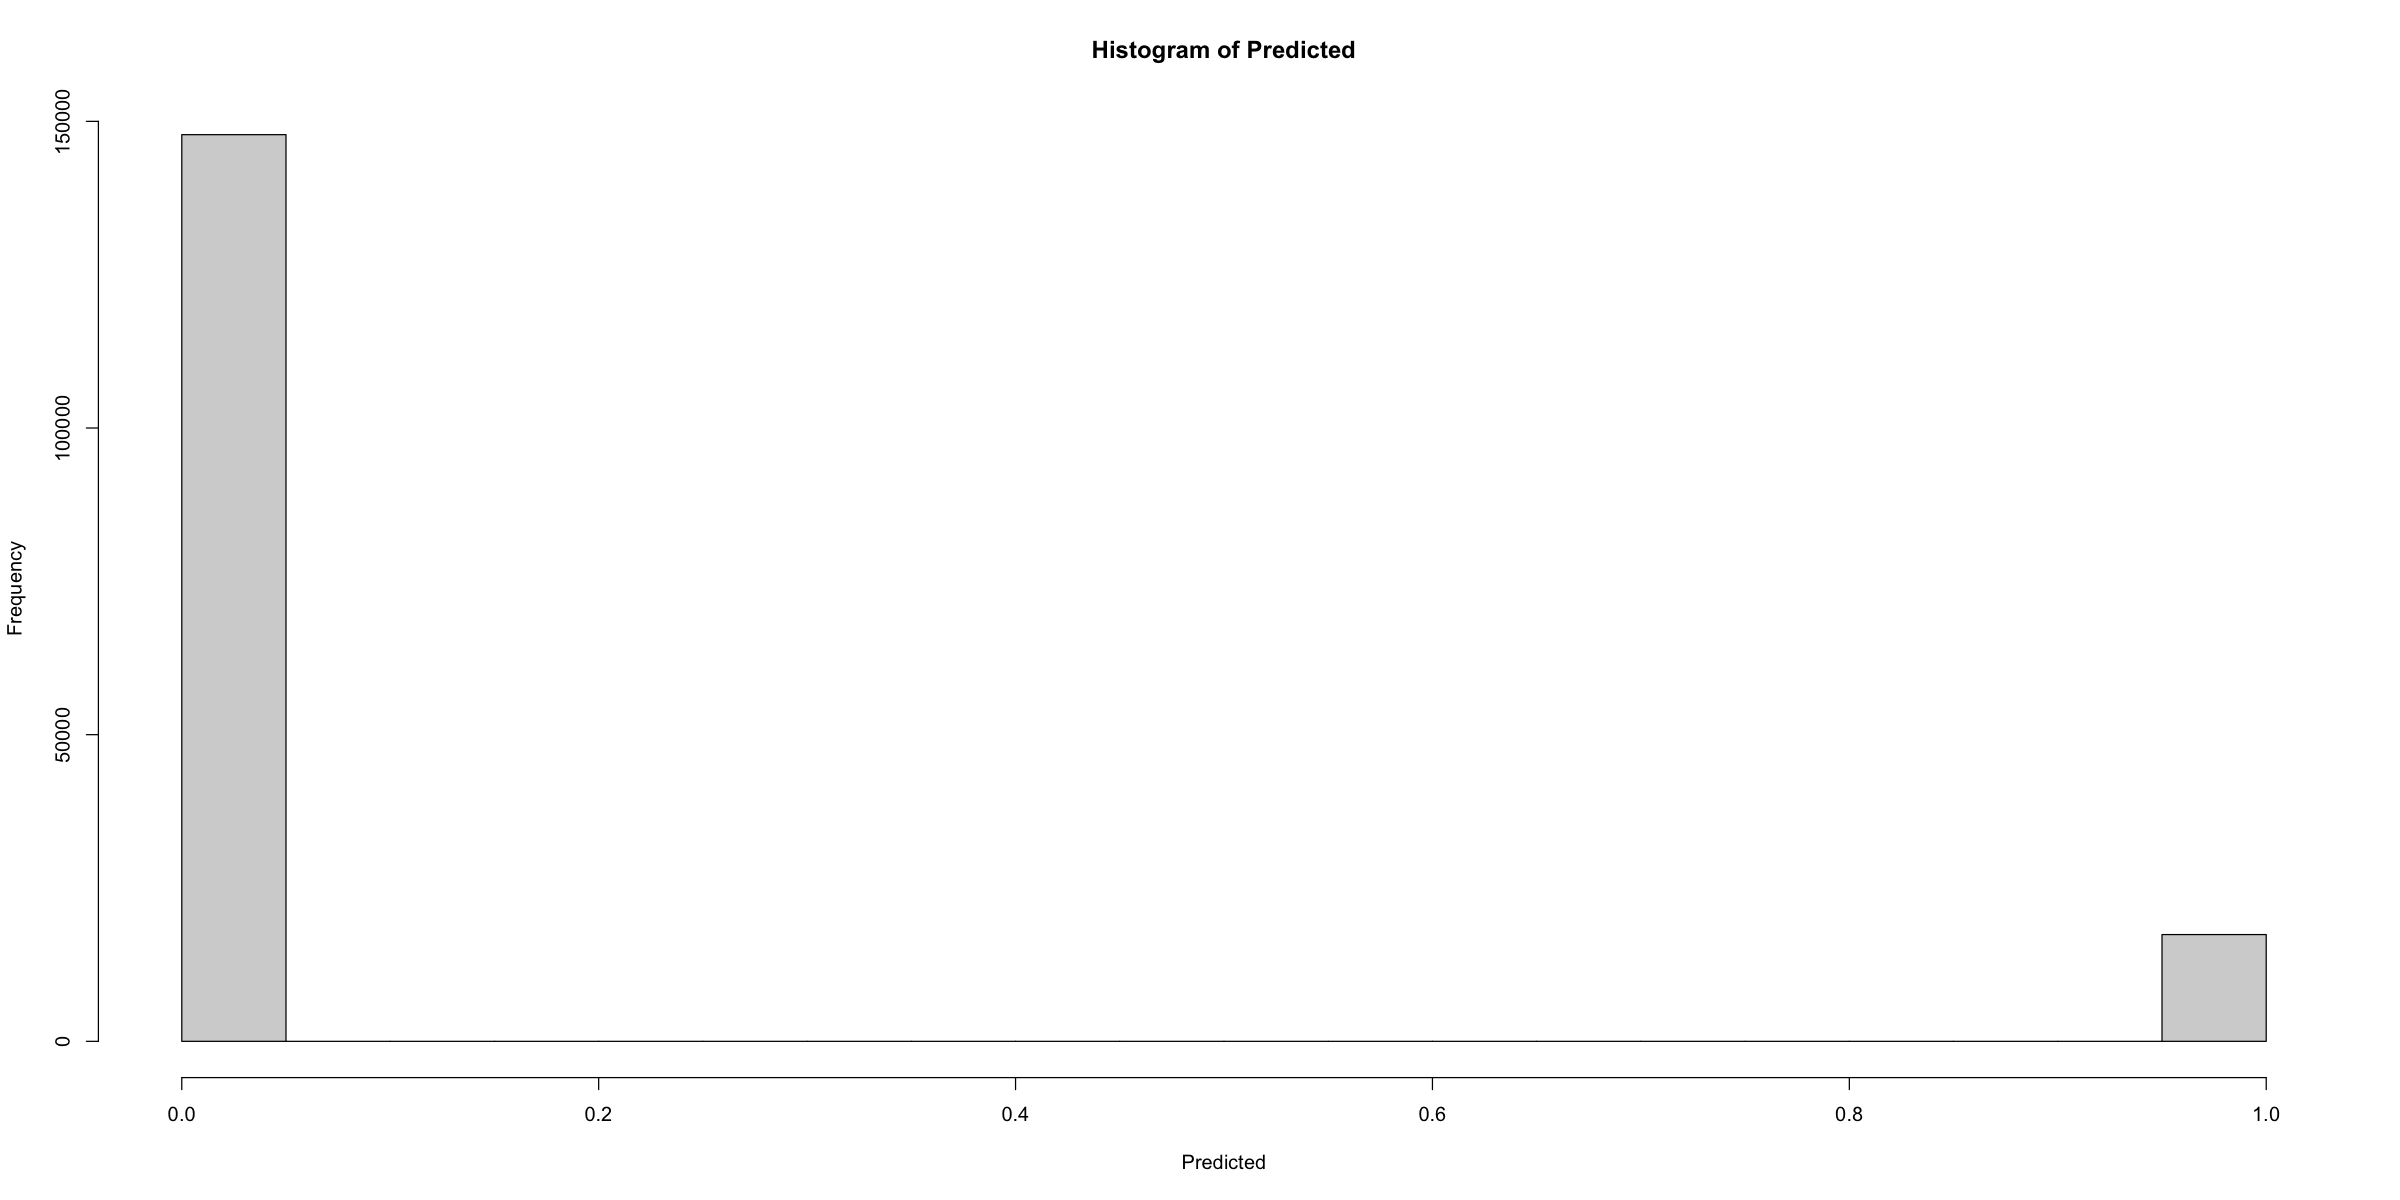

In [12]:
hist( Predicted)

creo una tabla con  lo que voy a enviar a Kaggle

In [13]:
entrega  <-  as.data.table( list( "numero_de_cliente"=dapply$numero_de_cliente, "Predicted"=Predicted)  )

In [14]:
head( entrega)

numero_de_cliente,Predicted
<int>,<dbl>
31116053,0
31116803,0
31117730,1
31117908,0
31117977,0
31120119,0


In [15]:
entrega[ , .N, Predicted]

Predicted,N
<dbl>,<int>
0,147829
1,17408


Esto significa que se enviaran 17408 estímulos

In [16]:
#genero el archivo para Kaggle
#creo la carpeta donde va el experimento
dir.create( "./exp/",  showWarnings = FALSE ) 
dir.create( "./exp/ZH2017/", showWarnings = FALSE )

fwrite( entrega, 
        file= "./exp/ZH2017/para_Kaggle_0107.csv",
        sep=  "," )